In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma
import pandas as pd
from tqdm import tqdm

from src.binomial import BetaBinomial, BBN

data = pd.read_csv('reduced_data.csv').set_index('CEPH ID')

In [24]:
X = data.values[:, :1000].astype(np.int8)
y = data.values[:, 1000:]


ix = [i for i in range(X.shape[0]) if 'Israel' in data['Geographic origin'].values[i]]
y[ix]
data.columns[1000:]

Index(['population', 'Geographic origin', 'Region', 'Pop7Groups', 'Sex'], dtype='object')

In [2]:
model = BBN(3., 3., include_MLE=True)

D = data.values[:, :1000].astype(np.int8)

results = []

for N in tqdm(range(1, D.shape[0], 5)):
    r_N = []
    for _ in range(max(3, 40 - N)):
        Dr = D[np.random.choice(D.shape[0], replace=True, size=N)]
        r_N.append(model.log_marginal_likelihood(Dr))
    results.append(r_N)
    
results = list(map(lambda v: np.mean(v), results))

100%|██████████| 209/209 [00:12<00:00,  8.69it/s]


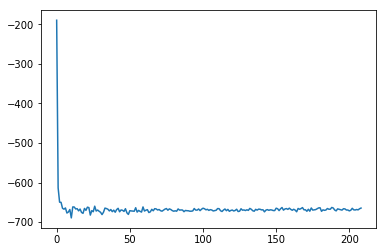

In [3]:
# norms = np.array(list(range(1, D.shape[0], 5)))
# norms = -np.log(norms)

plt.plot(range(len(results)), results)
plt.show()

In [3]:
class Leaf(object):
    
    def __init__(self, alpha):
        self.d = alpha
        self.N = 1
        self.pi = 1.
        
class Node(object):
    
    def __init__(self, left, right, alpha):
        self.N = left.N + right.N
        self.d = alpha * gamma(self.N) + left.d * right.d
        self.pi = alpha * gamma(self.N) / self.d

In [4]:
alpha = 0.5
leaf = lambda: Leaf(alpha)
node1_1 = lambda: Node(leaf(), leaf(), alpha)
node2_2 = lambda: Node(node1_1(), node1_1(), alpha)
node1_3 = lambda: Node(node1_1(), leaf(), alpha)

print(leaf().pi, node1_1().pi)
print(node2_2().pi)
print(node1_3().pi)

print(Node(node2_2(), leaf(), alpha).pi)

1.0 0.6666666666666666
0.8421052631578947
0.7272727272727273
0.8707482993197279
